In [ ]:
"""
Update file locations for your data and model
"""

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tensorflow as tf

import sys

from matplotlib import cm
import matplotlib.colors

In [ ]:
def ext_render_arch(arch):
    # render structural building data
    # and plot everything
    ax = plt.figure().add_subplot(projection='3d')
    alpha = 0.4
    green_1 = [0, 1, 0, alpha]
    blue_1 = [0, 0, 1, alpha]
    yellow_1 = [1, 1, 0, alpha]
    cyan_1 = [0, 1, 1, alpha]
    magenta_1 = [1, 0, 1, alpha]

    ax.voxels(arch, facecolors=green_1, edgecolors='k')
    ax.set_axis_off()  # remove if you want to see axis
    
    plt.show()

In [ ]:
def ext_render_struct(struct):
    # render structural building data
    # and plot everything
    ax = plt.figure().add_subplot(projection='3d')

    # ax.voxels(b_floors, facecolors='springgreen', edgecolors='k')
    
    """
    layer order:
    1. floors
    2. columns
    3. beams
    4. walls
    5. braces
    6. moment frames
    """
    colors = np.empty(struct.shape, dtype=object)

    colors = np.where(struct==1, 'g', colors)
    colors = np.where(struct==2, 'r', colors)
    colors = np.where(struct==3, 'b', colors)
    colors = np.where(struct==4, 'y', colors)
    colors = np.where(struct==5, 'c', colors)
    colors = np.where(struct==6, 'm', colors)
    
    ax.voxels(struct, facecolors=colors, alpha=0.4, edgecolors='k')
    ax.set_axis_off()  # remove if you want to see axis
    plt.show()

In [ ]:
def arch_input_plotly(arch):
    # 3d of arch input model - rotate
    l = 32
    X, Y, Z = np.mgrid[:l, :l, :l]
    vol = arch

    fig = go.Figure(data=go.Volume(
        x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
        value=vol.flatten(),
        opacity=0.1,
        surface_count=35,
        ))
    fig.update_layout(scene_xaxis_showticklabels=False,
                    scene_yaxis_showticklabels=False,
                    scene_zaxis_showticklabels=False)
    fig.show()

In [ ]:
def struct_plotly(pred):
    l = 32
    X, Y, Z = np.mgrid[:l, :l, :l]

    value_ = np.add(pred[0], pred[1], pred[2])
    value_ = np.add(value_, pred[3], pred[4])
    value_ = np.add(value_, pred[5], pred[6])

    fig = go.Figure(data=go.Volume(
        x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
        value=value_.flatten(),
        opacity=0.1,
        surface_count=25,
        ))

    fig.update_layout(scene_xaxis_showticklabels=False,
                        scene_yaxis_showticklabels=False,
                        scene_zaxis_showticklabels=False)
    fig.show()

In [ ]:
def pred_format_plot(pred):
    # pred = np.moveaxis(pred, 0, -1)
    pred[pred < 0] = 0
    pred = pred * 6
    pred = np.rint(pred)
    return pred

In [ ]:
plt.rcParams['figure.figsize'] = [10,10]

### VIEW GENERATOR DATA

In [ ]:
"""
input_x = np.load('/content/drive/MyDrive/framebot_V3/test_output/3_input.npy', allow_pickle=True)
label_y = np.load('/content/drive/MyDrive/framebot_V3/test_output/3_target.npy', allow_pickle=True)
pred = np.load('/content/drive/MyDrive/framebot_V3/test_output/3_prediction.npy', allow_pickle=True)
"""

In [ ]:
input_x = np.load('/content/drive/MyDrive/framebot_V3/sample_output/300000_input.npy', allow_pickle=True)
label_y = np.load('/content/drive/MyDrive/framebot_V3/sample_output/300000_target.npy', allow_pickle=True)
pred = np.load('/content/drive/MyDrive/framebot_V3/sample_output/300000_prediction.npy', allow_pickle=True)

In [ ]:
label_y = pred_format_plot(label_y)
pred= pred_format_plot(pred)

In [ ]:
np.amax(pred)

6.0

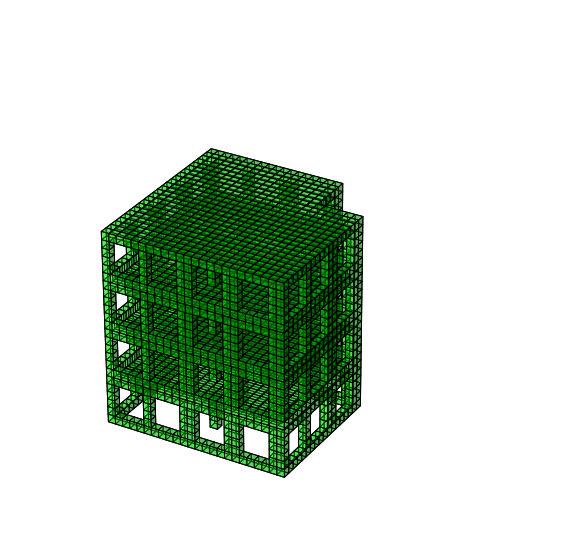

In [ ]:
ext_render_arch(input_x)

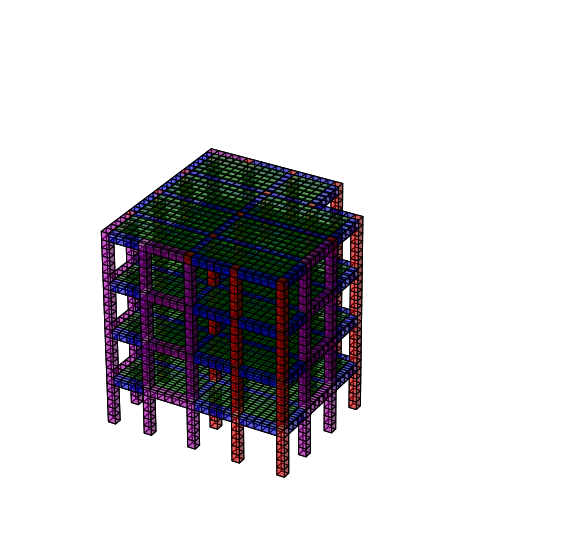

In [ ]:
ext_render_struct(label_y)

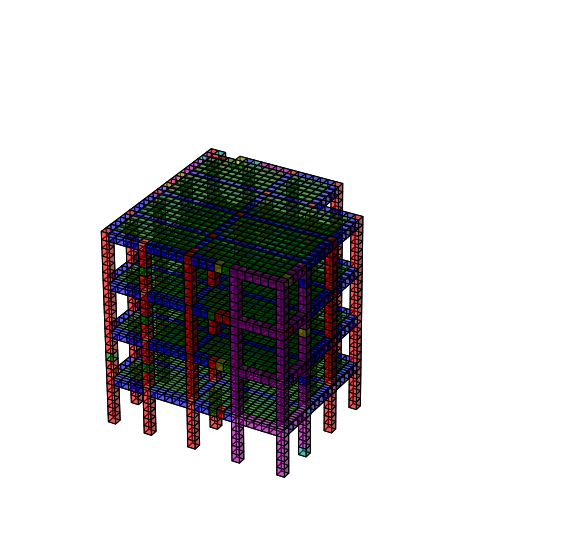

In [ ]:
ext_render_struct(pred)

In [ ]:
import plotly.graph_objects as go

In [ ]:
def arch_input_plotly(arch):
    # 3d of arch input model - rotate
    l = 32
    X, Y, Z = np.mgrid[:l, :l, :l]
    vol = arch

    fig = go.Figure(data=go.Volume(
        x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
        value=vol.flatten(),
        opacity=0.1,
        surface_count=35,
        ))
    fig.update_layout(scene_xaxis_showticklabels=False,
                    scene_yaxis_showticklabels=False,
                    scene_zaxis_showticklabels=False)
    fig.show()

In [ ]:
arch_input_plotly(pred)